# PKU-人工智能实践课-第一课-莺尾花代码

Created by Henry Huang
----
代码实现。

# 1.使用莺尾花数据集，进行神经网络初识。

导入包

In [325]:
import tensorflow as tf
import numpy as np

定义超参数

In [326]:
epoch=1000
lr=0.05
train_loss_result=[]
test_acc=[]

导入数据集

（遇到错误ImportError: cannot import name 'datasets'）--似乎是没有安装sklearn导致的

In [327]:
import sklearn.datasets as datasets

In [328]:
x_data = datasets.load_iris().data #返回iris数据集所有输入特征
y_data = datasets.load_iris().target #返回iris数据集所有标签

对数据进行乱序

In [329]:
np.random.seed(115) # 使用相同的seed，使输入特征/标签一一对应
np.random.shuffle(x_data)
np.random.seed(115)
np.random.shuffle(y_data) 
tf.random.set_seed(115)

分开训练集和测试集

知识点就是<font color=red>Python的正负索引</font>

列表中每个数都有一个正索引和负的索引。

切片时候，step为正决定从左往右取数，step为负决定从右往左取数。

**正索引：**左边第一个数索引是0，然后从左开始递增。

**负索引:**右边第一个数索引是0，然后从右边开始递减。

In [330]:
x_train = x_data[:-30]#这个操作结果跟[0:150-30]的效果是一样的
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

然后分batch

In [331]:
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)
#train_db=tf.cast(train_db,dtype=tf.double)
#test_db=tf.cast(test_db,dtype=tf.double)

定义一个4*3的全连接网络

<font color=red>这里必须将所有的都转化为float32才能进行矩阵乘法运算。float64不行，难道是怕乘法溢出？</font>

In [332]:
w1 = tf.Variable(tf.random.truncated_normal([4,3], stddev=0.1, seed=2))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=2))
w1=tf.cast(w1,dtype=tf.float32)
b1=tf.cast(b1,dtype=tf.float32)

In [333]:
for epoch in range(epoch): #数据集级别迭代
    for step, (x_train, y_train) in enumerate(train_db): #batch级别迭代
        loss_all=0
        with tf.GradientTape() as tape:# 记录梯度信息
            x_train=tf.cast(x_train,dtype=tf.float32)
            y_out=tf.matmul(x_train,w1) + b1 #计算神经网络的输出
            y_poss=tf.nn.softmax(y_out)#化为概率分布
            y_true=tf.one_hot(y_train,depth=3)#对真实值独热编码
            loss=tf.reduce_mean(tf.square(y_poss-y_true))#计算loss
            loss_all+=loss.numpy()
            
        grads = tape.gradient(loss, [w1,b1])
        w1.assign_sub(lr * grads[0]) #参数自更新
        
        b1.assign_sub(lr * grads[1])
    train_loss_result.append(loss_all/4)
    print("Epoch {}, loss: {}".format(epoch, loss_all/4))
    
    total_correct=0
    total_number=0
    for x_test, y_test in test_db: 
        x_test=tf.cast(x_test,dtype=tf.float32)
        y = tf.matmul(x_test, w1) + b1 # y为预测结果
        y = tf.nn.softmax(y) # y符合概率分布
        pred = tf.argmax(y, axis=1) # 返回y中最大值的索引，即预测的分类
        pred = tf.cast(pred, dtype=y_test.dtype) #调整数据类型与标签一致
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        correct = tf.reduce_sum (correct) # 将每个batch的correct数加起来
        total_correct += int (correct) # 将所有batch中的correct数加起来
        total_number += x_test.shape [0]
        acc = total_correct / total_number
        test_acc.append(acc)
    print("test_acc:", acc)

Epoch 0, loss: 0.0602487176656723
test_acc: 0.43333333333333335
Epoch 1, loss: 0.05828311666846275
test_acc: 0.0
Epoch 2, loss: 0.05677108094096184
test_acc: 0.03333333333333333
Epoch 3, loss: 0.05519834905862808
test_acc: 0.0
Epoch 4, loss: 0.05358148366212845
test_acc: 0.23333333333333334
Epoch 5, loss: 0.05196031555533409
test_acc: 0.5666666666666667
Epoch 6, loss: 0.05036843940615654
test_acc: 0.6333333333333333
Epoch 7, loss: 0.048831336200237274
test_acc: 0.6333333333333333
Epoch 8, loss: 0.047367095947265625
test_acc: 0.6333333333333333
Epoch 9, loss: 0.04598727077245712
test_acc: 0.6333333333333333
Epoch 10, loss: 0.04469788819551468
test_acc: 0.6333333333333333
Epoch 11, loss: 0.04350047558546066
test_acc: 0.6333333333333333
Epoch 12, loss: 0.04239322617650032
test_acc: 0.6333333333333333
Epoch 13, loss: 0.04137204959988594
test_acc: 0.6333333333333333
Epoch 14, loss: 0.040431465953588486
test_acc: 0.6333333333333333
Epoch 15, loss: 0.03956528380513191
test_acc: 0.633333333333

Epoch 151, loss: 0.018240435048937798
test_acc: 0.9666666666666667
Epoch 152, loss: 0.018180200830101967
test_acc: 0.9666666666666667
Epoch 153, loss: 0.018120352178812027
test_acc: 0.9666666666666667
Epoch 154, loss: 0.01806088350713253
test_acc: 0.9666666666666667
Epoch 155, loss: 0.01800178736448288
test_acc: 0.9666666666666667
Epoch 156, loss: 0.017943065613508224
test_acc: 0.9666666666666667
Epoch 157, loss: 0.017884714528918266
test_acc: 0.9666666666666667
Epoch 158, loss: 0.017826728522777557
test_acc: 0.9666666666666667
Epoch 159, loss: 0.017769111320376396
test_acc: 0.9666666666666667
Epoch 160, loss: 0.017711851745843887
test_acc: 0.9666666666666667
Epoch 161, loss: 0.01765494793653488
test_acc: 0.9666666666666667
Epoch 162, loss: 0.01759839989244938
test_acc: 0.9666666666666667
Epoch 163, loss: 0.01754220388829708
test_acc: 0.9666666666666667
Epoch 164, loss: 0.01748635619878769
test_acc: 0.9666666666666667
Epoch 165, loss: 0.017430854961276054
test_acc: 0.9666666666666667
E

test_acc: 1.0
Epoch 303, loss: 0.01215607300400734
test_acc: 1.0
Epoch 304, loss: 0.012130173854529858
test_acc: 1.0
Epoch 305, loss: 0.0121043985709548
test_acc: 1.0
Epoch 306, loss: 0.012078747153282166
test_acc: 1.0
Epoch 307, loss: 0.012053216807544231
test_acc: 1.0
Epoch 308, loss: 0.012027809396386147
test_acc: 1.0
Epoch 309, loss: 0.012002524919807911
test_acc: 1.0
Epoch 310, loss: 0.011977359652519226
test_acc: 1.0
Epoch 311, loss: 0.011952314525842667
test_acc: 1.0
Epoch 312, loss: 0.011927390471100807
test_acc: 1.0
Epoch 313, loss: 0.01190258376300335
test_acc: 1.0
Epoch 314, loss: 0.011877892538905144
test_acc: 1.0
Epoch 315, loss: 0.01185331866145134
test_acc: 1.0
Epoch 316, loss: 0.011828863993287086
test_acc: 1.0
Epoch 317, loss: 0.011804522015154362
test_acc: 1.0
Epoch 318, loss: 0.01178029552102089
test_acc: 1.0
Epoch 319, loss: 0.011756181716918945
test_acc: 1.0
Epoch 320, loss: 0.011732179671525955
test_acc: 1.0
Epoch 321, loss: 0.011708293110132217
test_acc: 1.0
Epoc

Epoch 473, loss: 0.009049986489117146
test_acc: 1.0
Epoch 474, loss: 0.00903723668307066
test_acc: 1.0
Epoch 475, loss: 0.00902453251183033
test_acc: 1.0
Epoch 476, loss: 0.009011874906718731
test_acc: 1.0
Epoch 477, loss: 0.008999262005090714
test_acc: 1.0
Epoch 478, loss: 0.008986692875623703
test_acc: 1.0
Epoch 479, loss: 0.008974169380962849
test_acc: 1.0
Epoch 480, loss: 0.008961688727140427
test_acc: 1.0
Epoch 481, loss: 0.008949256502091885
test_acc: 1.0
Epoch 482, loss: 0.008936864323914051
test_acc: 1.0
Epoch 483, loss: 0.008924517780542374
test_acc: 1.0
Epoch 484, loss: 0.00891221035271883
test_acc: 1.0
Epoch 485, loss: 0.008899952284991741
test_acc: 1.0
Epoch 486, loss: 0.00888773426413536
test_acc: 1.0
Epoch 487, loss: 0.008875560946762562
test_acc: 1.0
Epoch 488, loss: 0.00886342953890562
test_acc: 1.0
Epoch 489, loss: 0.008851341903209686
test_acc: 1.0
Epoch 490, loss: 0.008839292451739311
test_acc: 1.0
Epoch 491, loss: 0.008827287703752518
test_acc: 1.0
Epoch 492, loss: 

Epoch 641, loss: 0.007403323892503977
test_acc: 1.0
Epoch 642, loss: 0.007395815569907427
test_acc: 1.0
Epoch 643, loss: 0.007388330064713955
test_acc: 1.0
Epoch 644, loss: 0.0073808664456009865
test_acc: 1.0
Epoch 645, loss: 0.007373422384262085
test_acc: 1.0
Epoch 646, loss: 0.007366000674664974
test_acc: 1.0
Epoch 647, loss: 0.007358596660196781
test_acc: 1.0
Epoch 648, loss: 0.00735121313482523
test_acc: 1.0
Epoch 649, loss: 0.007343851029872894
test_acc: 1.0
Epoch 650, loss: 0.007336508948355913
test_acc: 1.0
Epoch 651, loss: 0.007329187355935574
test_acc: 1.0
Epoch 652, loss: 0.0073218876495957375
test_acc: 1.0
Epoch 653, loss: 0.0073146033100783825
test_acc: 1.0
Epoch 654, loss: 0.007307338062673807
test_acc: 1.0
Epoch 655, loss: 0.007300098892301321
test_acc: 1.0
Epoch 656, loss: 0.007292876485735178
test_acc: 1.0
Epoch 657, loss: 0.007285672705620527
test_acc: 1.0
Epoch 658, loss: 0.007278488017618656
test_acc: 1.0
Epoch 659, loss: 0.007271323818713427
test_acc: 1.0
Epoch 660,

test_acc: 1.0
Epoch 809, loss: 0.006378990598022938
test_acc: 1.0
Epoch 810, loss: 0.006374046206474304
test_acc: 1.0
Epoch 811, loss: 0.006369112990796566
test_acc: 1.0
Epoch 812, loss: 0.006364191882312298
test_acc: 1.0
Epoch 813, loss: 0.006359279155731201
test_acc: 1.0
Epoch 814, loss: 0.0063543785363435745
test_acc: 1.0
Epoch 815, loss: 0.006349490489810705
test_acc: 1.0
Epoch 816, loss: 0.006344611290842295
test_acc: 1.0
Epoch 817, loss: 0.00633974326774478
test_acc: 1.0
Epoch 818, loss: 0.006334889214485884
test_acc: 1.0
Epoch 819, loss: 0.00633004168048501
test_acc: 1.0
Epoch 820, loss: 0.006325206719338894
test_acc: 1.0
Epoch 821, loss: 0.006320382468402386
test_acc: 1.0
Epoch 822, loss: 0.0063155656680464745
test_acc: 1.0
Epoch 823, loss: 0.0063107628375291824
test_acc: 1.0
Epoch 824, loss: 0.006305971182882786
test_acc: 1.0
Epoch 825, loss: 0.006301188841462135
test_acc: 1.0
Epoch 826, loss: 0.006296415813267231
test_acc: 1.0
Epoch 827, loss: 0.006291654426604509
test_acc: 1

Epoch 978, loss: 0.005674620624631643
test_acc: 1.0
Epoch 979, loss: 0.005671108141541481
test_acc: 1.0
Epoch 980, loss: 0.005667606834322214
test_acc: 1.0
Epoch 981, loss: 0.005664107855409384
test_acc: 1.0
Epoch 982, loss: 0.005660617724061012
test_acc: 1.0
Epoch 983, loss: 0.005657134111970663
test_acc: 1.0
Epoch 984, loss: 0.0056536546908319
test_acc: 1.0
Epoch 985, loss: 0.0056501831859350204
test_acc: 1.0
Epoch 986, loss: 0.0056467182002961636
test_acc: 1.0
Epoch 987, loss: 0.005643258336931467
test_acc: 1.0
Epoch 988, loss: 0.005639804992824793
test_acc: 1.0
Epoch 989, loss: 0.005636363290250301
test_acc: 1.0
Epoch 990, loss: 0.005632919259369373
test_acc: 1.0
Epoch 991, loss: 0.005629485473036766
test_acc: 1.0
Epoch 992, loss: 0.005626059137284756
test_acc: 1.0
Epoch 993, loss: 0.0056226374581456184
test_acc: 1.0
Epoch 994, loss: 0.005619220435619354
test_acc: 1.0
Epoch 995, loss: 0.005615812726318836
test_acc: 1.0
Epoch 996, loss: 0.005612410604953766
test_acc: 1.0
Epoch 997, 

可视化

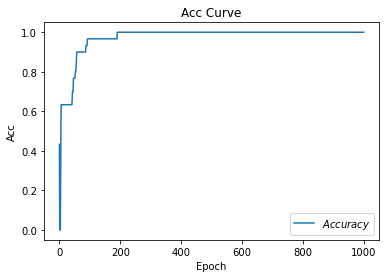

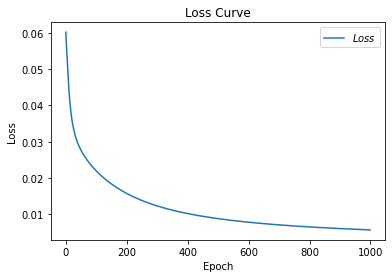

In [334]:
from matplotlib import pyplot as plt
plt.title('Acc Curve') # 图片标题
plt.xlabel('Epoch') # x轴名称
plt.ylabel('Acc') # y轴名称
plt.plot(range(epoch+1),test_acc, label="$Accuracy$") # 逐点画出test_acc值并连线
plt.legend()
plt.show()
plt.title('Loss Curve') # 图片标题
plt.xlabel('Epoch') # x轴名称
plt.ylabel('Loss') # y轴名称
plt.plot(range(epoch+1),train_loss_result, label="$Loss$") # 逐点画出test_acc值并连线
plt.legend()
plt.show()